# fastText

Make exports available:

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Imports

In [34]:
from similarities.similarities import FastTextSimilarity
from os import listdir
from statistics import mean, stdev
import matplotlib.pyplot as plt
import time

## Definitions

In [3]:
modelPath = "../../models/fastText/fastText.model"
spacyPath ="../../models/fastText/spacy.fastText.model"
experimentsClass = FastTextSimilarity(modelPath, spacyPath)

pathDataExperiment1 = "../../data/experiment1-small_text-continuous/"
pathDataExperiment2 = "../../data/experiment2-big_text-continuous/docs/"

# DOCUMENTS EXPERIMENT 1

print("DOCUMENTS EXPERIMENT 1\n")

docsExp1 = []
orgExp1 = ""
for doc in listdir(pathDataExperiment1):
    if doc.endswith(".txt"):
        if doc[-7:] == "ORG.txt":
            orgExp1 = pathDataExperiment1 + doc
        else:
            docsExp1.append(pathDataExperiment1 + doc)
            
docsExp1.sort(key = lambda x: int(x.split("_")[-1][:-4]))
            
print("DOCS: " + str(docsExp1) + "\n")
print("ORG: " + orgExp1)


# DOCUMENTS EXPERIMENT 2

print("\n DOCUMENTS EXPERIMENT 2\n")

docsExp2 = []
orgExp2 = ""
for doc in listdir(pathDataExperiment2):
    if doc.endswith(".txt"):
        if doc == "AE.txt":
            orgExp2 = pathDataExperiment2 + doc
        elif doc == "AI.txt":
            continue
        else:
            docsExp2.append(pathDataExperiment2 + doc)
            
docsExp2.sort(key = lambda x: int(x.split("_")[-1][:-4]))
            
print("DOCS: " + str(docsExp2) + "\n")
print("ORG: " + orgExp2)

DOCUMENTS EXPERIMENT 1

DOCS: ['../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_000.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_010.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_20.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_30.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_040.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_50.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_060.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_070.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_080.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_090.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_100.txt']

ORG: ../../data/experiment1-small_text-continuous/ORG.txt

 DOCUMENTS EXPERIMENT 2

DOCS: ['../../data/experiment2-big_text-continuous/docs/AE_AI_0.txt', '../../data/ex

## Experiments

### Experiment I (Small texts) - Model validation (Soft-Cosine Similarity)

In [4]:
results11 = []
times11 = []

for doc in docsExp1:
    start_time = time.time()
    results11.append(experimentsClass.distance(orgExp1, doc, 0, -1))
    times11.append(time.time() - start_time)
    
results11 = [1 - x for x in results11]

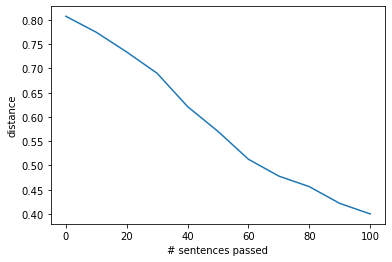

In [6]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 110, 10)), results11)

plt.savefig('../../figures/fastText_exp1_smallText_SoftCosine.png')

In [7]:
results11

[0.8075875411517452,
 0.774616136111775,
 0.7339394212723249,
 0.690061199155383,
 0.6214772082682956,
 0.5702745859075289,
 0.5128673174399505,
 0.4780778436032187,
 0.45638982110071247,
 0.42186781543818963,
 0.40016128941441276]

In [8]:
print("Mean execution time: " + str(mean(times11)))

Mean execution time: 3.5162009542638604


In [9]:
times11

[4.089054107666016,
 3.473850965499878,
 3.376370906829834,
 3.360150098800659,
 3.2835097312927246,
 3.526407241821289,
 3.418281078338623,
 3.855149269104004,
 3.821782112121582,
 3.2626030445098877,
 3.2110519409179688]

### Experiment I (Small texts) - Model validation (Normal Word Mover's Distance)

In [10]:
results12n = []
times12n = []

for doc in docsExp1:
    start_time = time.time()
    results12n.append(experimentsClass.distance(orgExp1, doc, 1, False))
    times12n.append(time.time() - start_time)

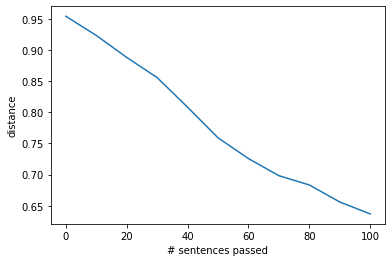

In [12]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 110, 10)), results12n)

plt.savefig('../../figures/fastText_exp1_smallText_NormalWordMovers.png')

In [13]:
results12n

[0.9540644142951963,
 0.923358055286978,
 0.8880811382358246,
 0.8557253719336434,
 0.8082171741091713,
 0.7591649712664034,
 0.7257641153565493,
 0.6983456436949361,
 0.6834454692277863,
 0.6561673788446754,
 0.6369959266036161]

In [14]:
print("Mean execution time: " + str(mean(times12n)))

Mean execution time: 41.71036973866549


In [15]:
times12n

[40.77116394042969,
 42.39766192436218,
 48.72582483291626,
 44.897939920425415,
 41.039084911346436,
 45.085426807403564,
 38.87747383117676,
 40.73581624031067,
 41.379436016082764,
 35.19652986526489,
 39.70770883560181]

### Experiment I (Small texts) - Model validation (Relaxed Word Mover's Distance)

In [16]:
results12r = []
times12r = []

for doc in docsExp1:
    start_time = time.time()
    results12r.append(experimentsClass.distance(orgExp1, doc, 1, True))
    times12r.append(time.time() - start_time)

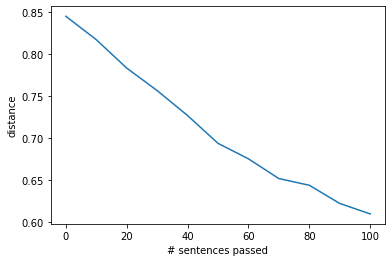

In [18]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 110, 10)), results12r)

plt.savefig('../../figures/fastText_exp1_smallText_RelaxedWordMovers.png')

In [19]:
results12r

[0.8452247381210327,
 0.8174086213111877,
 0.7836444973945618,
 0.7568922638893127,
 0.727196455001831,
 0.6941430568695068,
 0.6757186651229858,
 0.6522220969200134,
 0.6442768573760986,
 0.6226644515991211,
 0.6101983785629272]

In [20]:
print("Mean execution time: " + str(mean(times12r)))

Mean execution time: 0.3909784663807262


In [21]:
times12r

[0.46164798736572266,
 0.3648087978363037,
 0.3386821746826172,
 0.366610050201416,
 0.3969449996948242,
 0.43679189682006836,
 0.3627040386199951,
 0.41825413703918457,
 0.3755309581756592,
 0.36475491523742676,
 0.4140331745147705]

### Experiment II (Big texts) - Model validation (Soft-Cosine Similarity)

In [22]:
results21 = []
times21 = []

for doc in docsExp2:
    start_time = time.time()
    results21.append(experimentsClass.distance(orgExp2, doc, 0, -1))
    times21.append(time.time() - start_time)
    
results21 = [1 - x for x in results21]

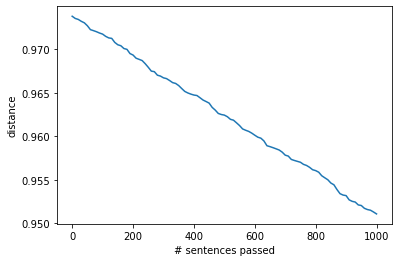

In [24]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 1010, 10)), results21)

plt.savefig('../../figures/fastText_exp2_bigText_SoftCosine.png')

In [25]:
results21

[0.9737851871640965,
 0.973533852094105,
 0.9734201678729509,
 0.9732019855137404,
 0.9730300732886856,
 0.9726930430402961,
 0.9722458863691719,
 0.9721324050543516,
 0.9720066426192286,
 0.9718554070741329,
 0.9717340676042795,
 0.9714774138474174,
 0.9713003685682358,
 0.9712423529844886,
 0.9707803662001265,
 0.9705091947674626,
 0.9703978824336226,
 0.9700782765383289,
 0.9699837784031494,
 0.9694993131801571,
 0.9693305048503422,
 0.9689676157527762,
 0.9688342875860267,
 0.9686942197567466,
 0.9683348541822175,
 0.9679249650617943,
 0.9674855692265841,
 0.9674205721613222,
 0.9670162343324058,
 0.9669150703967767,
 0.9667127148813481,
 0.9666245960883316,
 0.9664062202722336,
 0.9661647215228134,
 0.9660686673469936,
 0.965824457319214,
 0.9654816052352435,
 0.9651534782891912,
 0.9649767191606021,
 0.9648429284189274,
 0.9647363810476468,
 0.9646817250709249,
 0.964427242842521,
 0.9641635877759707,
 0.9639911829554291,
 0.9638110282344502,
 0.9633212870594344,
 0.9630091416549

In [26]:
print("Mean execution time: " + str(mean(times21)))

Mean execution time: 19.817567466509225


In [36]:
print("Stdev execution time: " + str(stdev(times21)))

Stdev execution time: 3.64504761454057


In [39]:
times21

[21.04670000076294,
 20.95235013961792,
 17.66390872001648,
 17.49127197265625,
 17.646043300628662,
 17.678126096725464,
 17.777180910110474,
 17.80192494392395,
 17.845795154571533,
 17.832530975341797,
 17.785282850265503,
 18.090886116027832,
 17.851040840148926,
 17.79252314567566,
 18.11253786087036,
 17.997343063354492,
 17.96545100212097,
 17.997183084487915,
 18.054633140563965,
 18.0282621383667,
 18.014322996139526,
 18.136047840118408,
 18.026158094406128,
 18.23767399787903,
 18.134187936782837,
 18.163537979125977,
 20.618700981140137,
 18.01903009414673,
 18.05808997154236,
 17.846956968307495,
 17.88289475440979,
 17.79976797103882,
 17.820220232009888,
 17.96471905708313,
 18.06963801383972,
 18.179033279418945,
 18.4513840675354,
 18.343685150146484,
 18.075428009033203,
 18.043874740600586,
 18.210999011993408,
 18.14833378791809,
 19.51550793647766,
 18.08286690711975,
 18.288392066955566,
 18.172757863998413,
 18.157362937927246,
 18.09819483757019,
 18.31321692466

### Experiment II (Big texts) - Model validation (Relaxed Word Mover's Distance)

In [29]:
results22 = []
times22 = []

for doc in docsExp2:
    start_time = time.time()
    results22.append(experimentsClass.distance(orgExp2, doc, 1, True))
    times22.append(time.time() - start_time)
    print(time.time() - start_time)

57.1024808883667
55.91094183921814
55.332441091537476
50.74978995323181
48.44125699996948
47.78327703475952
52.40687394142151
48.21312189102173
48.8550238609314
49.514325857162476
53.96231389045715
58.735076904296875
54.0718789100647
57.71220302581787
55.58797597885132
54.228362798690796
55.10588598251343
50.8955602645874
56.64440989494324
52.94968295097351
52.77544283866882
50.04562211036682
53.50523805618286
55.829489946365356
58.65716314315796
54.276225566864014
59.20172309875488
54.75910496711731
61.18073916435242
64.22225403785706
62.82100296020508
56.50874972343445
51.34944725036621
56.82758116722107
52.22231078147888
47.40941405296326
60.29032921791077
51.884073972702026
50.31286120414734
53.22440767288208
59.30342674255371
49.160849809646606
52.6753249168396
49.20097303390503
53.097890853881836
47.77794623374939
54.246204137802124
65.15419125556946
65.06958985328674
54.70825219154358
57.908079862594604
59.03143382072449
56.110738039016724
63.39803695678711
56.923189878463745
59

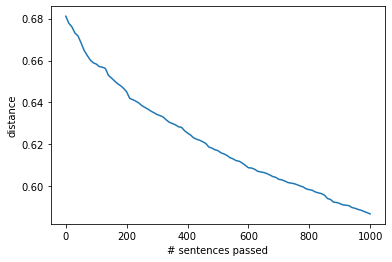

In [30]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 1010, 10)), results22)

plt.savefig('../../figures/fastText_exp2_bigText_WordMovers.png')

In [31]:
results22

[0.6811279058456421,
 0.6777735352516174,
 0.6760786175727844,
 0.6731559038162231,
 0.6717557907104492,
 0.668492317199707,
 0.6649396419525146,
 0.6625218987464905,
 0.6603379249572754,
 0.6589414477348328,
 0.6583234667778015,
 0.6571045517921448,
 0.6568289995193481,
 0.6562240719795227,
 0.6529537439346313,
 0.6516688466072083,
 0.6502915024757385,
 0.648958146572113,
 0.648003339767456,
 0.6467181444168091,
 0.6450492739677429,
 0.6419402956962585,
 0.6413304805755615,
 0.6406089663505554,
 0.6397640705108643,
 0.6384731531143188,
 0.6376314163208008,
 0.6368014812469482,
 0.6358388066291809,
 0.6350687146186829,
 0.6342286467552185,
 0.6337064504623413,
 0.6330305933952332,
 0.6316955089569092,
 0.6305536031723022,
 0.6299673914909363,
 0.6293436884880066,
 0.628412127494812,
 0.6281617879867554,
 0.6265591382980347,
 0.6254034042358398,
 0.6244681477546692,
 0.6230919361114502,
 0.6224311590194702,
 0.6219539642333984,
 0.6212683320045471,
 0.6204268336296082,
 0.61873888969421

In [37]:
print("Mean execution time: " + str(mean(times22)))

Mean execution time: 57.862297893750785


In [38]:
print("Stdev execution time: " + str(stdev(times22)))

Stdev execution time: 7.644498217441777


In [33]:
times22

[57.10242986679077,
 55.91094088554382,
 55.33244013786316,
 50.74978804588318,
 48.44125509262085,
 47.783276081085205,
 52.40687298774719,
 48.21311902999878,
 48.855021953582764,
 49.51432394981384,
 53.96231198310852,
 58.7350709438324,
 54.071877002716064,
 57.712198972702026,
 55.587974071502686,
 54.22836112976074,
 55.105884075164795,
 50.89555811882019,
 56.64440870285034,
 52.94968104362488,
 52.775439977645874,
 50.045620918273926,
 53.50523591041565,
 55.829488039016724,
 58.65716099739075,
 54.276222944259644,
 59.201719999313354,
 54.75910186767578,
 61.180737018585205,
 64.2222490310669,
 62.821001052856445,
 56.5087468624115,
 51.349446296691895,
 56.82757925987244,
 52.22230887413025,
 47.40941309928894,
 60.290323972702026,
 51.884072065353394,
 50.31286001205444,
 53.224406003952026,
 59.30342411994934,
 49.16084814071655,
 52.67532396316528,
 49.20097208023071,
 53.0978889465332,
 47.77794408798218,
 54.24445676803589,
 65.15415716171265,
 65.06954908370972,
 54.708